In [32]:
import numpy as np
import matplotlib.pyplot as plt
from theano import shared, function
import theano.tensor as T
from train_model import indicatorMatrix
import matplotlib.pyplot as plt
from get_data import prepare_data_to_next_step as gd
from math import ceil

# Theano Implementation

In [4]:
def error_rate(p, t):
    return np.mean(p != t)

def relu(a):
    return a*( a > 0 )

In [71]:
def model(l_rate, n_iter, reg, path, batch_size, hidden): 
    X_train, Y_train, X_test, Y_test = gd(path, -1)
    
    M, NX = X_train.shape
    n_batch = ceil(M/batch_size)
    test_indicatorMatrix = indicatorMatrix(Y_test)
    train_indicatorMatrix = indicatorMatrix(Y_train)
    K = train_indicatorMatrix.shape[1]
    
    W1_0 = np.random.randn(NX,hidden) / np.sqrt(21)
    b1_0 = np.zeros(hidden)
    W2_0 = np.random.randn(hidden,K) / np.sqrt(hidden)
    b2_0 = np.zeros(K)
    
    X = T.matrix('X')
    target = T.matrix('target')
    
    W1 = shared(W1_0, "W1")
    W2 = shared(W2_0, "W2")
    b1 = shared(b1_0, "b1")
    b2 = shared(b2_0, "b2")
    
    Z = relu( X.dot(W1) + b1 )
    Y = T.nnet.softmax( Z.dot(W2) + b2 )
    
    cost = -( target * np.log(Y) ).sum() + reg*((W1*W1).sum() + (b1*b1).sum() + (W2*W2).sum() + (b2*b2).sum())
    prediction = T.argmax( Y, axis = 1)
    
    update_W1 = W1 - l_rate*T.grad(cost, W1)
    update_b1 = b1 - l_rate*T.grad(cost, b1)
    update_W2 = W2 - l_rate*T.grad(cost, W2)
    update_b2 = b2 - l_rate*T.grad(cost, b2)
    
    train = function( inputs = [X, target], updates = [(W1, update_W1),(b1, update_b1),(W2, update_W2),(b2, update_b2)],)
    
    get_prediction = function( inputs = [X, target], outputs = [cost, prediction])
    
    LL = []
    
    for i in range(n_iter):
        for j in range(int(n_batch)):
            Xbatch = X_train[ j*batch_size : (j+1)*batch_size,]
            Ybatch = train_indicatorMatrix[ j*batch_size : (j+1)*batch_size,]
            
            train(Xbatch,Ybatch)
            if (j+1)%10 == 0:
                cost_val, prediction_val = get_prediction(X_test, test_indicatorMatrix)
                err = error_rate(prediction_val, Y_test)
                print(f"Iteration : {i+1} of batch {j+1} Test Cost : {cost_val:.3f} Test Error : {err:.3f}")
                LL.append(cost_val)

    return LL           

In [72]:
def plotter(LL):
    plt.title("Cost of Test Data on Mobile Phone Classification")
    plt.plot(LL, label = "Cost")
    plt.legend()
    plt.show()

In [73]:
history = model(0.001, 1000, 0.01, "train.csv", 100, 64)

Shape of data is (2000, 21)
Lenght of data is 2000
Split will occur after index of 1400...
Iteration : 1 of batch 10 Test Cost : 759.917 Test Error : 0.552
Iteration : 2 of batch 10 Test Cost : 645.242 Test Error : 0.427
Iteration : 3 of batch 10 Test Cost : 567.455 Test Error : 0.360
Iteration : 4 of batch 10 Test Cost : 508.814 Test Error : 0.315
Iteration : 5 of batch 10 Test Cost : 462.439 Test Error : 0.283
Iteration : 6 of batch 10 Test Cost : 424.792 Test Error : 0.245
Iteration : 7 of batch 10 Test Cost : 393.492 Test Error : 0.227
Iteration : 8 of batch 10 Test Cost : 367.302 Test Error : 0.210
Iteration : 9 of batch 10 Test Cost : 344.900 Test Error : 0.197
Iteration : 10 of batch 10 Test Cost : 325.386 Test Error : 0.185
Iteration : 11 of batch 10 Test Cost : 308.171 Test Error : 0.170
Iteration : 12 of batch 10 Test Cost : 292.930 Test Error : 0.165
Iteration : 13 of batch 10 Test Cost : 279.406 Test Error : 0.153
Iteration : 14 of batch 10 Test Cost : 267.358 Test Error : 

Iteration : 149 of batch 10 Test Cost : 106.196 Test Error : 0.077
Iteration : 150 of batch 10 Test Cost : 106.277 Test Error : 0.077
Iteration : 151 of batch 10 Test Cost : 106.280 Test Error : 0.077
Iteration : 152 of batch 10 Test Cost : 106.242 Test Error : 0.077
Iteration : 153 of batch 10 Test Cost : 106.282 Test Error : 0.077
Iteration : 154 of batch 10 Test Cost : 106.334 Test Error : 0.077
Iteration : 155 of batch 10 Test Cost : 106.283 Test Error : 0.077
Iteration : 156 of batch 10 Test Cost : 106.341 Test Error : 0.078
Iteration : 157 of batch 10 Test Cost : 106.365 Test Error : 0.078
Iteration : 158 of batch 10 Test Cost : 106.357 Test Error : 0.078
Iteration : 159 of batch 10 Test Cost : 106.370 Test Error : 0.078
Iteration : 160 of batch 10 Test Cost : 106.417 Test Error : 0.078
Iteration : 161 of batch 10 Test Cost : 106.424 Test Error : 0.078
Iteration : 162 of batch 10 Test Cost : 106.365 Test Error : 0.078
Iteration : 163 of batch 10 Test Cost : 106.394 Test Error : 0

Iteration : 287 of batch 10 Test Cost : 112.424 Test Error : 0.083
Iteration : 288 of batch 10 Test Cost : 112.518 Test Error : 0.083
Iteration : 289 of batch 10 Test Cost : 112.523 Test Error : 0.083
Iteration : 290 of batch 10 Test Cost : 112.597 Test Error : 0.083
Iteration : 291 of batch 10 Test Cost : 112.657 Test Error : 0.083
Iteration : 292 of batch 10 Test Cost : 112.733 Test Error : 0.083
Iteration : 293 of batch 10 Test Cost : 112.802 Test Error : 0.083
Iteration : 294 of batch 10 Test Cost : 112.805 Test Error : 0.083
Iteration : 295 of batch 10 Test Cost : 112.801 Test Error : 0.083
Iteration : 296 of batch 10 Test Cost : 112.890 Test Error : 0.083
Iteration : 297 of batch 10 Test Cost : 112.994 Test Error : 0.083
Iteration : 298 of batch 10 Test Cost : 112.974 Test Error : 0.083
Iteration : 299 of batch 10 Test Cost : 112.998 Test Error : 0.083
Iteration : 300 of batch 10 Test Cost : 113.097 Test Error : 0.083
Iteration : 301 of batch 10 Test Cost : 113.172 Test Error : 0

Iteration : 427 of batch 10 Test Cost : 118.919 Test Error : 0.083
Iteration : 428 of batch 10 Test Cost : 118.942 Test Error : 0.083
Iteration : 429 of batch 10 Test Cost : 118.986 Test Error : 0.083
Iteration : 430 of batch 10 Test Cost : 119.001 Test Error : 0.083
Iteration : 431 of batch 10 Test Cost : 119.030 Test Error : 0.083
Iteration : 432 of batch 10 Test Cost : 119.094 Test Error : 0.083
Iteration : 433 of batch 10 Test Cost : 119.146 Test Error : 0.083
Iteration : 434 of batch 10 Test Cost : 119.164 Test Error : 0.083
Iteration : 435 of batch 10 Test Cost : 119.161 Test Error : 0.083
Iteration : 436 of batch 10 Test Cost : 119.225 Test Error : 0.083
Iteration : 437 of batch 10 Test Cost : 119.275 Test Error : 0.083
Iteration : 438 of batch 10 Test Cost : 119.308 Test Error : 0.083
Iteration : 439 of batch 10 Test Cost : 119.298 Test Error : 0.083
Iteration : 440 of batch 10 Test Cost : 119.349 Test Error : 0.083
Iteration : 441 of batch 10 Test Cost : 119.398 Test Error : 0

Iteration : 563 of batch 10 Test Cost : 123.179 Test Error : 0.083
Iteration : 564 of batch 10 Test Cost : 123.212 Test Error : 0.083
Iteration : 565 of batch 10 Test Cost : 123.221 Test Error : 0.083
Iteration : 566 of batch 10 Test Cost : 123.239 Test Error : 0.083
Iteration : 567 of batch 10 Test Cost : 123.265 Test Error : 0.083
Iteration : 568 of batch 10 Test Cost : 123.296 Test Error : 0.083
Iteration : 569 of batch 10 Test Cost : 123.327 Test Error : 0.083
Iteration : 570 of batch 10 Test Cost : 123.334 Test Error : 0.083
Iteration : 571 of batch 10 Test Cost : 123.347 Test Error : 0.083
Iteration : 572 of batch 10 Test Cost : 123.379 Test Error : 0.083
Iteration : 573 of batch 10 Test Cost : 123.419 Test Error : 0.083
Iteration : 574 of batch 10 Test Cost : 123.407 Test Error : 0.083
Iteration : 575 of batch 10 Test Cost : 123.454 Test Error : 0.083
Iteration : 576 of batch 10 Test Cost : 123.472 Test Error : 0.083
Iteration : 577 of batch 10 Test Cost : 123.526 Test Error : 0

Iteration : 697 of batch 10 Test Cost : 125.800 Test Error : 0.088
Iteration : 698 of batch 10 Test Cost : 125.828 Test Error : 0.088
Iteration : 699 of batch 10 Test Cost : 125.807 Test Error : 0.088
Iteration : 700 of batch 10 Test Cost : 125.848 Test Error : 0.088
Iteration : 701 of batch 10 Test Cost : 125.871 Test Error : 0.088
Iteration : 702 of batch 10 Test Cost : 125.881 Test Error : 0.088
Iteration : 703 of batch 10 Test Cost : 125.877 Test Error : 0.088
Iteration : 704 of batch 10 Test Cost : 125.879 Test Error : 0.088
Iteration : 705 of batch 10 Test Cost : 125.917 Test Error : 0.088
Iteration : 706 of batch 10 Test Cost : 125.933 Test Error : 0.088
Iteration : 707 of batch 10 Test Cost : 125.952 Test Error : 0.088
Iteration : 708 of batch 10 Test Cost : 125.948 Test Error : 0.088
Iteration : 709 of batch 10 Test Cost : 125.955 Test Error : 0.088
Iteration : 710 of batch 10 Test Cost : 125.988 Test Error : 0.088
Iteration : 711 of batch 10 Test Cost : 126.004 Test Error : 0

Iteration : 846 of batch 10 Test Cost : 127.454 Test Error : 0.087
Iteration : 847 of batch 10 Test Cost : 127.460 Test Error : 0.087
Iteration : 848 of batch 10 Test Cost : 127.495 Test Error : 0.087
Iteration : 849 of batch 10 Test Cost : 127.503 Test Error : 0.087
Iteration : 850 of batch 10 Test Cost : 127.465 Test Error : 0.087
Iteration : 851 of batch 10 Test Cost : 127.496 Test Error : 0.087
Iteration : 852 of batch 10 Test Cost : 127.491 Test Error : 0.087
Iteration : 853 of batch 10 Test Cost : 127.516 Test Error : 0.087
Iteration : 854 of batch 10 Test Cost : 127.498 Test Error : 0.087
Iteration : 855 of batch 10 Test Cost : 127.516 Test Error : 0.087
Iteration : 856 of batch 10 Test Cost : 127.517 Test Error : 0.087
Iteration : 857 of batch 10 Test Cost : 127.548 Test Error : 0.087
Iteration : 858 of batch 10 Test Cost : 127.553 Test Error : 0.087
Iteration : 859 of batch 10 Test Cost : 127.527 Test Error : 0.087
Iteration : 860 of batch 10 Test Cost : 127.539 Test Error : 0

Iteration : 995 of batch 10 Test Cost : 128.338 Test Error : 0.087
Iteration : 996 of batch 10 Test Cost : 128.331 Test Error : 0.087
Iteration : 997 of batch 10 Test Cost : 128.338 Test Error : 0.087
Iteration : 998 of batch 10 Test Cost : 128.328 Test Error : 0.087
Iteration : 999 of batch 10 Test Cost : 128.344 Test Error : 0.087
Iteration : 1000 of batch 10 Test Cost : 128.348 Test Error : 0.087


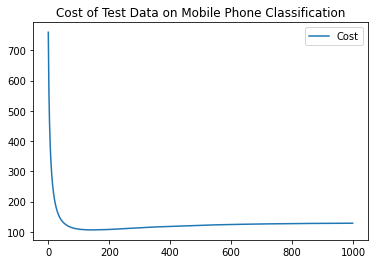

In [74]:
plotter(history)